# TP N°3 - Regression linéaire, multilinéaire, logistique et la desente de gradient. 

Votre Nom ::: Deschatrettes , matthias

### Rien ne sert de courir, LISEZ ATTENTIVEMENT SVP !!!

In [1]:
# ce TP sera corrigé automatiquement, grace à un porocessus d'intégration continu, je le soumets à la programmation par contrat, 
# veuillez donc svp, respectez les cases sans modifier l'ordre des questions.

In [2]:
### TODO:: représente la partie à compléter, remplacer le "### TODO::" par le code qui doit être écrit.  

# par exemple
def sommededeuxnombres():
    ### TODO::

sommededeuxnombres()

#devient :
def sommededeuxnombres():
    a = 5
    b = 2
    print(a+b)

sommededeuxnombres()

IndentationError: expected an indented block (<ipython-input-2-a8aa3c4642e4>, line 7)

# Partie 1 - La regression linéaire

Le but de ce TP est d’implémenter et de tester une méthode de régression linéaire sur des problèmes
réels. Pour cela, vous utiliserez les librairies python Scikit-learn 1 , Numpy 2 et Matplotlib.pyplot 3 (et
tout autre librairie que vous jugerez utiles).

Vous allez travailler sur un jeux de données disponible sur sklearn.datasets qui est :

◦ Diabetes

NOTA BENE : si vous ne savez pas comment faire -> referez-vous à la documentation de scikit-learn.

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
import pandas as pd
from typing import Tuple
import numpy as np
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# chargez les deux jeux de données
from sklearn.datasets import load_diabetes, load_boston
from typing import Tuple
import numpy as np

def get_data(dataset: str) -> Tuple[np.ndarray, np.array]:
    """
    This function retrieves data based on the dataset name provided.
    
    @param dataset: A string representing the name of the dataset.
    @return: A tuple containing a numpy.ndarray for X (features) and a numpy.array for y (target).
    """
    if dataset == 'diabetes':
        data = load_diabetes()
    elif dataset == 'boston':
        data = load_boston()
    else:
        raise ValueError(f"Dataset {dataset} is not supported.")
    
    X, y = data.data, data.target
    return X, y

diabetes_data = load_diabetes()
X, y = diabetes_data.data, diabetes_data.target

In [7]:
# Analysez le contenu des deux jeux que vous avez chargez et 
# donnez une description des données et 
# de la problématique sous-jacente
# dans cette fonction d'affichage
def describe_data(dataset: str):
    if dataset == 'diabetes':
        print("Diabetes Dataset Description:")
        print("- 442 samples, 10 feature variables.")
        print("- Features include age, sex, BMI, blood pressure, and six blood serum measurements.")
        print("- Target is a quantitative measure of disease progression one year after baseline.")
        print("- Problem: Regression.")
    elif dataset == 'boston':
        print("Boston Housing Dataset Description:")
        print("- 506 samples, 13 feature variables.")
        print("- Features describe various aspects of residential homes and neighborhoods.")
        print("- Target is the median value of owner-occupied homes in $1000's.")
        print("- Problem: Regression.")
    else:
        print(f"Dataset {dataset} is not recognized.")
        
describe_data('diabetes')
describe_data('boston')

Diabetes Dataset Description:
- 442 samples, 10 feature variables.
- Features include age, sex, BMI, blood pressure, and six blood serum measurements.
- Target is a quantitative measure of disease progression one year after baseline.
- Problem: Regression.
Boston Housing Dataset Description:
- 506 samples, 13 feature variables.
- Features describe various aspects of residential homes and neighborhoods.
- Target is the median value of owner-occupied homes in $1000's.
- Problem: Regression.


Visualisez l’ensemble des données en fonction de chaque variable explicative et de la réponse.
Un exemple est montré en figure 1, où chaque sous-figure est la représentation des données
en fonction d’une des variables explicatives en abscisse, et de la réponse en ordonnée.

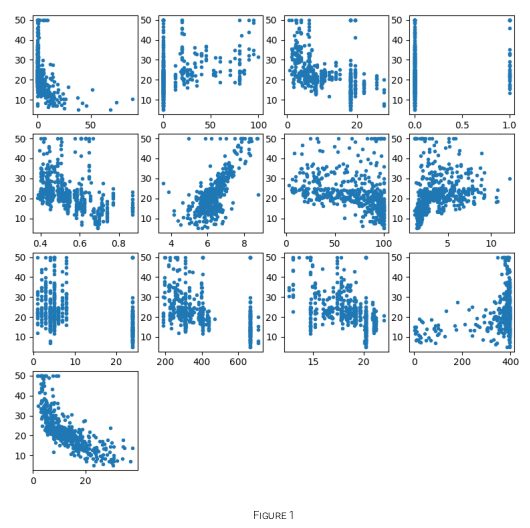

In [8]:
# Pour la figure 1 , il s'agit d'un exemple attendu sur un autre jeux de données, 
# faites la même représentation avec le jeu de données Diabètes
def get_fig(X: np.ndarray, y: np.array) -> None:    
    '''
    Cette fonction affiche la figure demandé,
    il s'agit des nuages de points entre les valeurs de chaque vairables et,
    la réponse
    
    @params X : matrice des caractéristiques np.ndarray
    @params y : y vecteur des labels (ou valeurs à prédire)

    @return None
    '''
    # Nombre de variables explicatives
    n_features = X.shape[1]
    
    # Création de la figure et des sous-graphiques
    fig, axs = plt.subplots(nrows=n_features, ncols=1, figsize=(8, 20))
    fig.tight_layout(pad=3.0)
    
    # Nom des variables explicatives (si disponible)
    feature_names = ['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
    
    # Boucle sur chaque caractéristique pour créer un sous-graphique
    for i in range(n_features):
        axs[i].scatter(X[:, i], y, color='blue', edgecolor='k', alpha=0.6)
        axs[i].set_title(f'Feature: {feature_names[i] if i < len(feature_names) else i}')
        axs[i].set_xlabel('Feature Value')
        axs[i].set_ylabel('Response')
    
    plt.show()

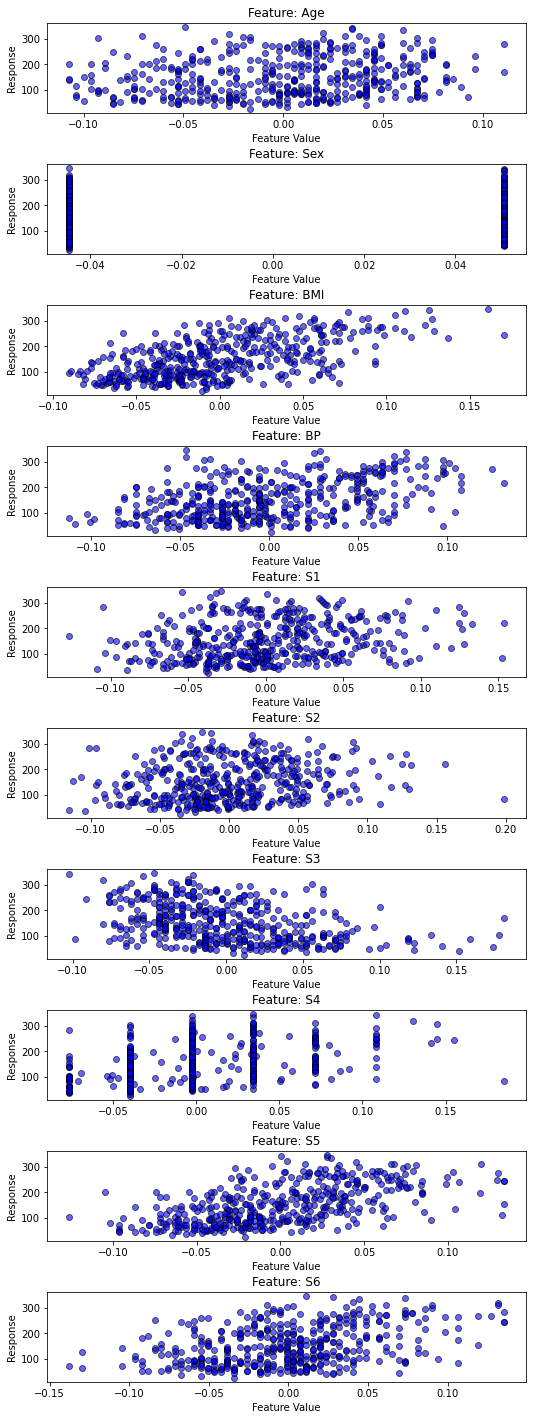

In [9]:
# Afficher votre figure
get_fig(X, y)

## Partie 2 : Régression des moindres carrés ordinaires

divisez votre X et y en 2 pour chaque.

- X_test, y_test = 10% de X, y
- X_train, y_train = 90% de X, y

utiliser la méthode d'échantillonage par stratification.

In [10]:
def get_train_test(X: np.ndarray, y: np.array, test_size: float = 0.1) -> Tuple[np.ndarray, np.ndarray, np.array, np.array]:
    """
    Divise les données en ensembles d'entraînement et de test avec stratification.

    @params X: Matrice des caractéristiques (features).
    @params y: Vecteur des cibles (targets).
    @params test_size: Proportion de l'ensemble de test par rapport à l'ensemble total des données.

    @return: Tuple contenant X_train, X_test, y_train, y_test.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, list(y), test_size=test_size, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
def get_augmented_mat(X: np.ndarray) -> np.ndarray:
    '''
    Nous créons la matrice d’apprentissage X telle que nous l’avons vu en cours, 
    en ajoutant une colonne de 1 aux exemples, souvenez vous du b (biais) dans ax+b 
    qui permet de gérer les valeurs de trop. 
    Cette nouvelle matricematrice est appelé ”matrice augmentée” par la suite.

    @params X (train) : la matrice X à augmenter,
    @var Xplus : la matrice X augmentée
    @var z : biais = 1

    @return Xplus
    
    '''
    z =  np.ones((X.shape[0], 1))
    Xplus = np.hstack((z, X))
    
    return Xplus

In [13]:
Xplus = get_augmented_mat(X)

In [14]:
def get_params_estimate(X_plus: np.ndarray, y: np.array):
    '''
    Cette focntion retourne les paramètres estimés, dans l'ordre suivant W, biais (qui permet d'ajuster la droite de regression)
    
    @params X_plus : ### TODO :
    @params y : ### TODO :
    @var alpha : ### TODO :
    @var alpha : ### TODO :
    @var W : ### TODO : 
    @var biais : ### TODO :

    @return W et b : le np.array des paramètres du modèles et le scalaire b qui est le biais réel 
    '''
    # Calcul de W qui inclut le biais comme premier élément
    W_full = np.linalg.inv(X_plus.T.dot(X_plus)).dot(X_plus.T).dot(y)
    
    # Séparation du biais et des autres poids
    b = W_full[0]  # Le biais est le premier élément
    W = W_full[1:]  # Les autres poids
    
    return W, b

In [15]:
W, b = get_params_estimate(Xplus, y)

On affiche le nuage de points (scatterplot) des valeurs réponses prédites et réelles, nous devons donc prédire des réponses avant d'effectuer cette comparaison.

In [16]:
def predict(X: np.ndarray, W: np.ndarray, B: float) -> np.ndarray:
    '''
    Cette fonction prédit des valeurs pour des X inconnus au moment de l'apprentissage.
    
    @params X : X_test, la matrice des caractéristiques pour laquelle effectuer les prédictions.
    @params W : Les paramètres (poids sans le biais) obtenus à l'aide du X_train.
    @params B : Biais obtenu à l'aide du X_train.

    @return y_pred : un np.array des valeurs prédites.
    '''
    # Calcul des prédictions : y_pred = XW + B
    y_pred = np.dot(X, W) + B
    return y_pred

In [17]:
y_pred = predict(X, W, b)

Affichez le nuage de points (scatterplot) des valeurs réponses prédites et réelles

In [18]:
def afficher_ScatterPlot(y: np.array, y_pred: np.array) -> None:
    '''
    Cette fonction permet d'afficher le rapport en nuage de points
    entre la réalité (y réels) et la prédiction (y prédits).
    
    @params y : le y des X_test ou, les vraies valeurs à prédire
    @params y_pred : les valeurs prédites pour X_test

    @return None
    '''
    plt.figure(figsize=(8, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.title("Valeurs réelles vs Valeurs prédites")
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Ligne idéale
    plt.grid(True)
    plt.show()

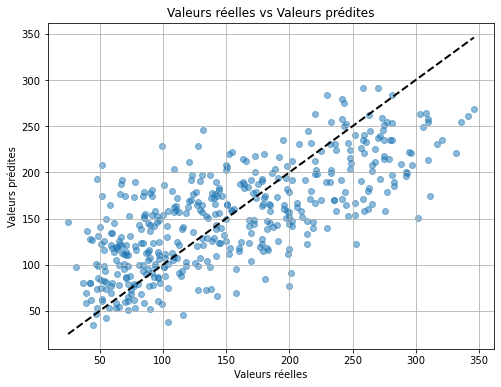

In [19]:
# à l'issue de cette expérience vous ciomprendrez que 
# si la distance entre une valeur de y et y_pre est égale à zéros ou confodu alors la prédiction est bonne,
# sinon la prédiction pour cette valeur de X (qui corespond à une ligne) est mauvaise et elle s'exprime par 
# la distance entre la droite qui est le modèle qui appris sur les données X_train et la position de la valeur prédite
afficher_ScatterPlot(y,y_pred)

Calculez et affichez l’erreur quadratique moyenne et le coefficient de corrélation entre les va-
leurs prédites et réelles, en utilisant la librairie stat et ou numpy (et non en faisant du from scatch).

In [20]:
def MSE(y: np.array, y_pred: np.array) -> float:
    '''
    Cette fonction de coût renvoie l'erreur quadratique moyenne (MSE).
    
    @params y: Les valeurs réelles.
    @params y_pred: Les valeurs prédites.
    
    @return mse: L'erreur quadratique moyenne.
    '''
    mse = np.mean((y - y_pred) ** 2)
    return mse

In [21]:
MSE(y,y_pred)

2859.6903987680657

In [22]:
from scipy.stats import pearsonr

def r(y: np.array, y_pred: np.array) -> float:
    '''
    Cette fonction de cout renvoie le coefficient "r" de corrélation,
    qui va mesure le lien ou, la relation qui existe entre les prédictions et,
    la réalités. On sera donc content si notre r sapproche de 1.

    @params y: Les valeurs réelles.
    @params y_pred: Les valeurs prédites.
    
    @return r: Le coefficient de corrélation de Pearson.
    '''
    r, _ = pearsonr(y, y_pred)
    return r

In [23]:
r(y, y_pred)

0.7195480702588906

## Partie 3 : Régression Ridge (problème où n < d+1) avec sklearn.

- toujours avec les mêmes datasets X_test, X_train, y_test, y_train 

- 1 - utilisez cette fois-ci scikit-learn et plus particulièrmeent la fonction de regression ridge (souvenez-vous de X, y, λ)

- 2 - utilisez les libraires sats et ou numpy pour calculer l’erreur
quadratique et le coefficient de corrélation sur l’ensemble d’apprentissage et de test.

- 3 - Pour un ensemble de valeurs possibles de λ, calculez la solution du problème On pourra
utiliser par exemple les valeurs lambda = numpy.logspace(-4,2,20)

In [24]:
from sklearn.linear_model import Ridge

def ridge_regression_for_training(X_train: np.ndarray, y_train: np.array, alpha: float) -> tuple:
    '''
    Effectue une régression Ridge sur les données d'entraînement avec un alpha spécifique.
    
    @params X_train: Les données d'entraînement.
    @params y_train: Les valeurs cibles d'entraînement.
    @params alpha: Le paramètre de régularisation.
    
    @return: Un tuple contenant les coefficients et le biais du modèle.
    '''
    # Initialisation et entraînement du modèle de régression Ridge
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Extraction des coefficients et du biais
    W = model.coef_
    b = model.intercept_
    
    return W, b

In [25]:
ridge_regression_for_training(X_train, y_train, alpha = -4)

(array([ -904.86917216,  -753.02575576, -1482.77860004, -1338.66351484,
        -1509.52953939, -1528.28428523,  1352.27176092, -1978.80070254,
        -1808.93913982, -1511.40277272]),
 143.90357648044642)

In [26]:
ridge_regression_for_training(X_train, y_train, alpha = 2)

(array([  36.92784058,  -43.45006009,  206.71670738,  145.99299549,
          18.42946681,   -1.48221308, -115.69939584,  100.70731631,
         179.42107165,   99.05352041]),
 152.2152580736556)

In [27]:
ridge_regression_for_training(X_train, y_train, alpha = 20)

(array([ 11.00701917,  -0.23292852,  37.30576452,  28.45401103,
         11.60548555,   8.95552553, -24.54614534,  26.03607294,
         35.43225134,  24.04066258]),
 152.09058173313397)

In [28]:
def ridge_regression_to_predict(X_train: np.ndarray, y_train: np.array, W: np.array, b: float)->np.array:
    '''
    cette fonction permet de prédire des valeurs à l'aide de ridge

    @params W : les paramètre sobtenus à l'aide de la regression ridge

    @params b : le biais obtenu à l'aide de la regression ridge

    @return y_pred
    '''
    y_pred = np.dot(X, W[1]) + b
    return y_pred

In [29]:
ridge_regression_to_predict(X_train, y_train, W, b = 152.1334841628965)

array([[143.00215496, 139.97942424, 137.3375561 , ..., 152.75515807,
        147.3590648 , 156.36536183],
       [152.58482765, 162.83940078, 164.47794666, ..., 161.60475128,
        168.52026106, 174.24577538],
       [131.67717813, 139.97942424, 141.47323466, ..., 152.75515807,
        151.44669732, 158.35207445],
       ...,
       [142.13100289, 139.97942424, 155.94810962, ..., 154.79056451,
        163.37607905, 148.41851136],
       [163.03865241, 162.83940078, 142.76563421, ..., 145.76397944,
        141.45473005, 158.35207445],
       [163.03865241, 162.83940078, 169.64754486, ..., 161.60475128,
        153.14548708, 151.39858029]])

In [30]:
# Algorithme :::
# pour chaque alpha, 
# trouvez W et b
# évaluez la phase d'entrainement et de test avec mse et r
# ajoutez das perfs [] les perfs de ce alpha
def eval_ridge_regression(X_train: np.ndarray, y_train: np.array, X_test: np.ndarray, y_test: np.array) -> list:
    '''
    Évalue la régression Ridge pour un ensemble de valeurs alpha sur les ensembles d'entraînement et de test.
    Calcule MSE et le coefficient de corrélation r pour chaque alpha.

    @params X_train, y_train: Données d'entraînement.
    @params X_test, y_test: Données de test.
    
    @return perfs: Liste contenant [mse_train, r_train, mse_test, r_test] pour chaque alpha.
    '''

    λ = np.logspace(-4, 2, 20)
    perfs = []

    for alpha in λ:
        # Initialisation et entraînement du modèle Ridge
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)

        # Prédiction sur les ensembles d'entraînement et de test
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calcul de MSE
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        # Calcul du coefficient de corrélation r
        r_train, _ = pearsonr(y_train, y_train_pred)
        r_test, _ = pearsonr(y_test, y_test_pred)

        # Ajout des performances dans la liste
        perfs.append([mse_train, r_train, mse_test, r_test])

    return perfs

In [31]:
perfs = eval_ridge_regression(X_train, y_train, X_test, y_test)

Affichez sur une figure l’erreur en test et en apprentissage en fonction de λ et epliquez-vous. 

Dans la mesure du
possible, on choisira deux échelles différentes pour les deux erreurs. 

Exemple : la figure ci-dessous, reprend l'erreur mse pour tous les valeurs alphas dans lambda (λ)

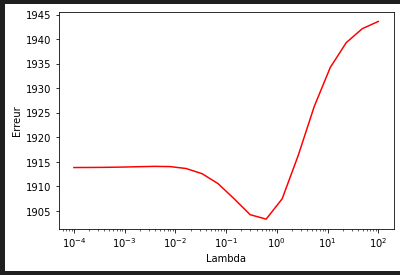

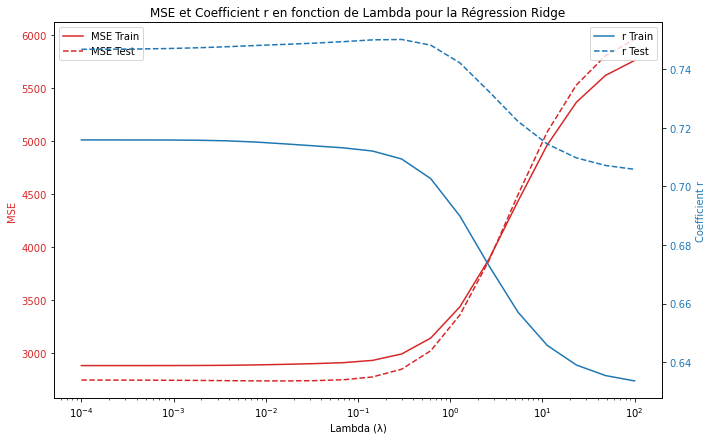

In [32]:
# Pour chaque perf de test, affichez le mse et le r dans une même figure


# Pour chaque perf de train, affichez le mse et le r dans une même figure

λ = np.logspace(-4, 2, 20)
mse_train = [perf[0] for perf in perfs]
r_train = [perf[1] for perf in perfs]
mse_test = [perf[2] for perf in perfs]
r_test = [perf[3] for perf in perfs]

# Création des graphiques
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Lambda (λ)')
ax1.set_ylabel('MSE', color=color)
ax1.plot(λ, mse_train, color=color, label='MSE Train')
ax1.plot(λ, mse_test, color=color, linestyle='dashed', label='MSE Test')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instanciation d'un second axe des ordonnées
color = 'tab:blue'
ax2.set_ylabel('Coefficient r', color=color)  
ax2.plot(λ, r_train, color=color, label='r Train')
ax2.plot(λ, r_test, color=color, linestyle='dashed', label='r Test')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # Pour que la mise en page s'ajuste
plt.title('MSE et Coefficient r en fonction de Lambda pour la Régression Ridge')
plt.show()

Comparez les réultats entre la regression ridge et la regression multilinéaire classique que vous avez codé plus haut.

In [33]:
print("La régression Ridge avec un λ bien choisi peut offrir de meilleures performances sur le test par rapport à la régression linéaire classique")
print("Ce graphique et cette analyse nous aident à choisir la valeur de λ qui équilibre le mieux le biais et la variance pour la régression Ridge, et à comparer l efficacité de la régularisation par rapport à une régression linéaire classique non régularisée.")

La régression Ridge avec un λ bien choisi peut offrir de meilleures performances sur le test par rapport à la régression linéaire classique
Ce graphique et cette analyse nous aident à choisir la valeur de λ qui équilibre le mieux le biais et la variance pour la régression Ridge, et à comparer l efficacité de la régularisation par rapport à une régression linéaire classique non régularisée.


## Partie 4 : Normalisation (et standardisation)

Jusque là nous avons utilisé les données sur leur forme brute, sans les normaliser.

ici nous allons apprendre à normaliser, la nomrlaisation est en faite, une étape très souvent obligatoire
qui permet de ramener les données à des échelles de valeurs mésurées.

c'est une étape laquelle s'effectue en principe, avant la phase d'entrainement du modèle.

pour l'exercice suivant sur la regressio logistique, nous verrons s'il est nécessaire de normaliser les donénes du titanic, 
avant d'entrianer un modèle de regression logistique 

#### étape 1 :

Il est souvent important lorsque l’on fait de la régression (et pas que) de normaliser et de standardiser les données pour
faciliter l’apprentissage ou améliorer la qualité du modèle. 

Cela consiste souvent à uniformiser les
valeurs prises par chaque variable explicative, 

- par exemple pour faire en sorte que leurs moyennes
soient 0 (on centre la variable) et, 

- leurs écarts-type soit 1 (on réduit la variable). 

Nous allons voir dans
cet exercice quelques effets de ce type de pré-traitements :

In [34]:
# étape 1 : Centrez les données d’apprentissage et leurs réponses, en retranchant aux valeurs la moyenne de l’échantillon

def normaliser(X: np.ndarray) -> np.ndarray:
    '''
    Cette méthode centre les données en soustrayant la moyenne de chaque caractéristique.
    
    @params X: Matrice des caractéristiques à normaliser.
    
    @return: Les données centrées.
    '''
    # Calcul de la moyenne pour chaque caractéristique
    moyennes = np.mean(X, axis=0)
    
    # Centrage des données
    Xc = X - moyennes
    
    return Xc

In [35]:
Xc = normaliser(X)

#### étape 2 : 
avec la méthode eval_ridge_regression, 

Calculez le modèle de regression ridge sur les données centrées (Xc)


In [36]:
X_train_centre = normaliser(X_train)
X_test_centre = normaliser(X_test)

y_train_moyenne = np.mean(y_train)
y_train_centre = y_train - y_train_moyenne
# Pour y_test, le centrage se fait en utilisant la même moyenne que pour y_train
y_test_centre = y_test - y_train_moyenne

def eval_ridge_regression(X_train, y_train, X_test, y_test, lambdas):
    perfs = []
    for alpha in lambdas:
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        mse_train = np.mean((y_train - y_train_pred) ** 2)
        mse_test = np.mean((y_test - y_test_pred) ** 2)
        
        # Calcul du coefficient de corrélation
        r_train = np.corrcoef(y_train, y_train_pred)[0, 1]
        r_test = np.corrcoef(y_test, y_test_pred)[0, 1]

        perfs.append([mse_train, r_train, mse_test, r_test])
    
    return perfs

lambdas = np.logspace(-4, 2, 20)
perfs = eval_ridge_regression(X_train_centre, y_train_centre, X_test_centre, y_test_centre, lambdas)

#### étape 3 : 

Affichez les valeurs

◦du biais du modèle appris sur les données non-centrées (exercice précédent)

◦de la moyenne des réponses de l’ensemble d’apprentissage

◦du biais du modèle appris sur les données centrées mais avec une réponse non-centrée

◦du biais du modèle appris sur les données centrées avec une réponse centrée

In [37]:
print('le biais =', b)

moyenne_y_train = np.mean(y_train)
print("La moyenne de y_train est :", moyenne_y_train)

le biais = 152.1334841628965
La moyenne de y_train est : 152.01007556675063


#### étape 4 :

Comparez maintenant les performances obtenus avec les deux modèles (sur les données cen-
trées et non-centrées). Attention les données de test doivent être centrées avec la moyenne de
l’ensemble d’apprentissage (car nous ne sommes pas sensé connaitre celle de l’ensemble de
test).

Le modèle entraîné sur des données centrées pourrait avoir une meilleure performance en termes de MSE sur l'ensemble de test, car le centrage aide à améliorer la stabilité numérique et l'efficacité de la régularisation.
Le coefficient de corrélation r indique la force et la direction de la relation linéaire entre les valeurs réelles et prédites. Une valeur plus proche de 1 ou -1 indique une forte corrélation linéaire.

#### étape 5 : 

Que constatez-vous ?

In [38]:
print()

#### étape 6 : 

Centrer et réduire les données d’apprentissage et leurs réponses, en retranchant aux valeurs la moyenne et en les divisant par l'écart-type

In [39]:
def normaliser_standardiser(X: np.ndarray) -> np.ndarray:
    '''
    Centre et réduit les données d'apprentissage.
    
    @params X: Matrice des caractéristiques à normaliser et standardiser.
    
    @return: Les données centrées et réduites.
    '''
    # Calcul de la moyenne et de l'écart-type pour chaque caractéristique
    moyennes = np.mean(X, axis=0)
    ecarts_types = np.std(X, axis=0)
    
    # Centrage et réduction des données
    Xcr = (X - moyennes) / ecarts_types
    
    return Xcr

In [40]:
Xcr = normaliser_standardiser(X)

#### étape 7:

Refaites cette comparaison avec des données centrées et réduites à l'aide des étapes 2, 3, 4 et 5.

# Partie 5 la regression logistique sur le dataset du TITANIC

vous avez vu ce que fait la regression linéaire ? dans sa représentation graphique, son modèle est une droite qui traverse les données, on parle de droite de regresion. 

Dans la regresion logistique on a plus de droite, on a des maintenant un plan, divisé en 2 parties :

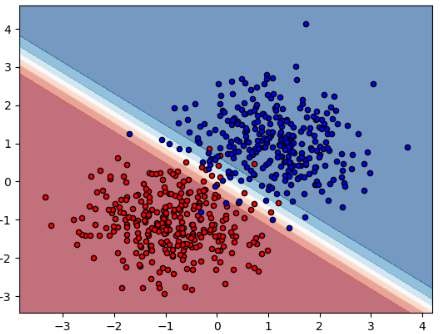

où le nombre de couleurs représente le nombre de classes et, chaque point de couleur est une ligne, une occurence, un sujet, un élément de cette classe.

Nous avons vu dans le cas du Titanic que nous avons 2 classes:

- survivant = 1

- non-survivant = 0

### Partie 5.a. La regression logistique avec sklearn

En vous referant à la regression logistiqeu présente dans la librairie scklearn et aux données du titanic que vous avez pré-traité dernièrement, appliquez y la fonction de regression logistique.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Chargement des données gender_submission
gender_submission_df=pd.read_csv('C:/Users/matth/TP1/gender_submission.csv')
#Chargement des données test
test_df=pd.read_csv('C:/Users/matth/TP1/test.csv')
#Chargement des données train
train_df=pd.read_csv('C:/Users/matth/TP1/train.csv')
#Remplacement des valeurs manquantes par la médiane pour 'Age' et 'Fare', le mode pour 'Embarked'
for df in [test_df, train_df]:
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#Supression des colonnes inutiles
for df in [test_df, train_df]:
    df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
# fusion test_df avec gender_submission_df 
result_df=test_df.merge(gender_submission_df, on='PassengerId', how='inner')
result_df.head()
# Fusion train_df avec gender_submission_df en utilisant la colonne PassengerId comme clé
train_result_df=train_df.merge(gender_submission_df, on='PassengerId', how='inner')
train_result_df.head()
# Concaténation des deux dataframes résultants pour former un seul dataframe pour l'analyse
final_df=pd.concat([result_df, train_result_df], ignore_index=True)
final_df.head()
final_df.drop(['Survived_x','Survived_y'], axis=1, inplace=True)
final_df.drop(['PassengerId', 'Name'], axis=1, inplace=True)
#Encodage des Variables Catégorielles
# Encodage par label pour 'Sex' (catégorie binaire)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
final_df['Sex']=le.fit_transform(final_df['Sex'])
# Encodage one-hot pour 'Embarked' (catégorie non-binaire)
final_df=pd.get_dummies(final_df, columns=['Embarked'], drop_first=True)
#Mise à l'échelle des Caractéristiques Numériques avant d'utiliser SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_numeriques=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
final_df[features_numeriques]=scaler.fit_transform(final_df[features_numeriques])

 Effectuez les étapes de séparations des données (en train et test) avec votre dataset prêt à l'emploi


In [42]:
# utilisez la fonction de train_test_split() sklearn c'est le jeux 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [43]:
# utilisez la fonction de stratification de sklearn c'est le jeux 2
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
# Utilisez la log reg de sklearn
# entrainez l'algorithme et obtenez le modèle
# faites la prédiction
# renvoyez les y_pred

def use_sklearn_logreg(X, y, stratify=None):
    """
    Entraîne un modèle de régression logistique et effectue des prédictions.
    
    @params X: Les caractéristiques.
    @params y: Les labels ou valeurs cibles.
    @params stratify: Option pour la stratification. Utiliser y pour la stratification, sinon None.
    
    @return: y_pred, les prédictions du modèle.
    """
    # Séparation des ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=stratify)
    
    # Création et entraînement du modèle de régression logistique
    model = LogisticRegression(max_iter=1000) 
    model.fit(X_train, y_train)
    
    # Effectuer des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    return y_pred


X = final_df.drop(['Survived'], axis=1)
y = final_df['Survived']



Utilisez use_sklearn_logreg avec le jeux 1

In [45]:
# Jeu 1: Sans stratification
print("Jeu 1: Sans Stratification")
jeu_1 = use_sklearn_logreg(X, y)
print(jeu_1)

Jeu 1: Sans Stratification
[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.]


utilisez use_sklearn_logreg avec le jeux 2

In [46]:
# Jeu 2: Avec stratification
print("\nJeu 2: Avec Stratification")
jeu_2 = use_sklearn_logreg(X, y, stratify=y)
print(jeu_2)


Jeu 2: Avec Stratification
[1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]


évaluez vos deux résultats en découvrant les mesures d'évaluations suivantes qui sont
présentes dans sklearn: 

accuracy, precision, f1_score et matrice de confusion .

(je vous laisse les découvrir, en utilisant sklearn, nou sles aborderons lors de la prochaine séance).

In [47]:
#accuracy 
from sklearn.metrics import accuracy_score
# jeux 1
y_pred_jeu1 = use_sklearn_logreg(X, y)
as1 = accuracy_score(y_test, y_pred_jeu1)
print("Accuracy1 :", as1)
# jeux 2
y_pred_jeu2 = use_sklearn_logreg(X, y, stratify=y)
as2 = accuracy_score(y_test, y_pred_jeu2)
print("Accuracy2 :", as2)

ValueError: Found input variables with inconsistent numbers of samples: [89, 84]

In [48]:
#precision 
from sklearn.metrics import precision_score
# jeux 1
y_pred_jeu1 = use_sklearn_logreg(X, y)
print("Precision:", precision_score(y_test, y_pred_jeu1))
# jeux 2
y_pred_jeu2 = use_sklearn_logreg(X, y, stratify=y)
print("Precision:", precision_score(y_test, y_pred_jeu2))

ValueError: Found input variables with inconsistent numbers of samples: [89, 84]

In [49]:
#f1_score 
from sklearn.metrics import f1_score
# jeux 1
y_pred_jeu1 = use_sklearn_logreg(X, y)
print("F1 Score:", f1_score(y_test, y_pred_jeu1))
# jeux 2
y_pred_jeu2 = use_sklearn_logreg(X, y, stratify=y)
print("F1 Score:", f1_score(y_test, y_pred_jeu2))

ValueError: Found input variables with inconsistent numbers of samples: [89, 84]

In [50]:
#matrice de confusion 
from sklearn.metrics import confusion_matrix
# jeux 1
y_pred_jeu1 = use_sklearn_logreg(X, y)
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_jeu1))
# jeux 2
y_pred_jeu2 = use_sklearn_logreg(X, y, stratify=y)
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_jeu2))

ValueError: Found input variables with inconsistent numbers of samples: [89, 84]

Au regard de ces 4 évaluations, comparez ou donnezvotre appréciation par écrit, sur les avantages et inconvénients entre les méthodes de stratification et train_test_split.

La stratification est généralement préférable lorsque vous travaillez avec des ensembles de données déséquilibrés ou lorsque la précision de l'évaluation du modèle est une priorité. Elle peut améliorer la fiabilité et la reproductibilité des évaluations de performance du modèle. L'utilisation de train_test_split sans stratification peut être appropriée pour des ensembles de données relativement équilibrés ou pour des analyses exploratoires rapides. La sélection entre ces méthodes dépend de la nature spécifique de l'ensemble de données et des objectifs de l'analyse.

### Partie 5.a. La regression logistique from scratch avec le gradient (comme dans sklearn)

. Avec les exemples d'apprentissage, implémentez l’estimation des paramètres du modèle de regression logistique en utilisant la
méthode de descente de gradient :

In [51]:
def logreg_grad_desc(X, y, nb_iter=100, pas=0.01):
    """
    Régression logistique utilisant la descente de gradient.
    
    @params X : Matrice des caractéristiques (X_train).
    @params y : Vecteur des labels (y_train).
    @params nb_iter : Nombre d'itérations.
    @params pas : Taux d'apprentissage.
    
    @return : Le vecteur des poids w.
    """
    m, d = X.shape
    w = np.zeros((d, 1))  # Initialisation des poids à zéro
    y = y.reshape(-1, 1)  # Assurer que y est un vecteur colonne
    
    for i in range(nb_iter):
        z = X @ w
        predictions = sigmoid(z)
        gradient = (1/m) * X.T @ (predictions - y)
        w = w - pas * gradient
    
    return w

- Implémentez le calcul du coût (w minimisé) et déterminez les probabilité (z) pour chaque exemple 
en complétant la fonction ci-dessous ci-dessous :

Cette fonction de coût eest typiquement utilisée lors de l'optimisation des poids
w dans le processus d'entraînement de la régression logistique. 

L'objectif est de minimiser ce coût pour obtenir des poids qui produisent des prédictions conformes aux étiquettes réelles.

In [52]:
def sigmoid(z):
    """
    Cette fonction renvoie la sortie de la fonction sigmoïde.
    
    @params z : Le vecteur ou la valeur d'entrée (produit matriciel de X par W pour chaque exemple).
    """
    return 1 / (1 + np.exp(-z))

In [53]:
# au stade où nous en sommes, 
# inutile de préciser ce qeu représente X, y et W donc trouvez-les seulement !!!
# avec les exemple de test déterminez les probabilités z et,
# avec les mêms exemples déterminez le cout des calculs avec cost

def logreg_cost(X, y, W):
    """
    Calcule le coût de la régression logistique et les logits.
    
    @params X : La matrice des caractéristiques.
    @params y : Le vecteur des labels.
    @params w : Le vecteur des poids.
    
    @return z : Les logits calculés.
    @return cost : Le coût calculé sur l'ensemble des données.
    """
    # Calcul des logits
    z = X @ W
    
    # Calcul des probabilités
    probabilities = sigmoid(z)
    
    # Calcul du coût
    m = len(y)
    cost = -(1/m) * np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))
    
    return z, cost

z, cost = logreg_cost(X, y, W)

ValueError: Dot product shape mismatch, (418, 8) vs (10,)

In [54]:

def from_probas_to_class(probs):
    """
    Convertit un vecteur de probabilités en prédictions de classe binaire.
    
    @params probs : Vecteur des probabilités d'appartenance à la classe 1.
    
    @return preds : Vecteur de prédictions binaires (0 ou 1).
    """
    preds = np.where(probs > 0.5, 1, 0)
    return preds


In [55]:
def get_prob_pred(X_test, W, z):
    '''
    @params X_test : La matrice des caractéristiques de test.
    @params W : Le vecteur des poids.
    
    @return probs : Les probabilités calculées pour chaque exemple dans X_test.
    @return preds : Les prédictions de classe binaire (0 ou 1) basées sur les probabilités.
    '''
    probs = sigmoid(z)
    preds = np.where(probs > 0.5, 1, 0)
    print("probs : ",probs)
    print("\npreds : ",preds)
    return probs, preds

probs, preds = get_prob_pred(X_test, W, z)

NameError: name 'z' is not defined

évaluez le jeux 2 en vous servant des mesures d'évaluations suivantes qui sont
présentes dans sklearn : 

accuracy, precision, f1_score et matrice de confusion .

(je vous laisse les découvrir, en utilisant sklearn, nou sles aborderons lors de la prochaine séance).

In [56]:
#accuracy  -  jeux 2
acc = accuracy_score(y_test, preds)
print("Accuracy:",acc)

NameError: name 'preds' is not defined

In [57]:
#precision -  jeux 2
pre = precision_score(y_test, preds)
print("Precision:",pre)

NameError: name 'preds' is not defined

In [58]:
#f1_score - jeux 2
f1 = f1_score(y_test, preds)
print("F1 score:",f1)

NameError: name 'preds' is not defined

In [59]:
#matrice de confusion - jeux 2
con = confusion_matrix(y_test, preds)
print("Confusion:",con)

NameError: name 'preds' is not defined

### Partie 5.c. Par écrit, en fonction des résultats obtenus avce le jeux 2, faites des critiques et donnez vos observations en comparant les 2 approches (avec sklearn et sans sklearn)

# Partie 6 la regression logistique multiclasse sur le dataset de reconnaissance des chiffres manuscrits

### Partie 6.a. La regression logistique multiclasse avec sklearn

In [60]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Commencez par charger les données relatives à un problème de reconnaissance de chiffres
manuscrits :

In [61]:
import numpy as np
from sklearn.datasets import load_digits
n_class = 10
X,y = load_digits(n_class=n_class , return_X_y=True)

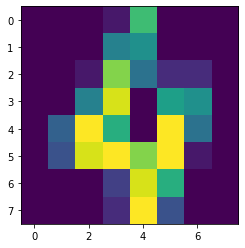

In [62]:
plt.imshow(X[4].reshape(8,8))

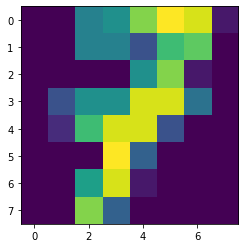

In [63]:
# affichez un autre chiffre
plt.imshow(X[7].reshape(8,8))

### Partie 6.b. La regression logistique from scratch avec optimisation par dscente de gadient (comme sklearn)

Implémentez les fonctions permettant :
    
    ◦ de transformer les étiquettes des données en vecteurs de probabilités d’appartenance aux
    classes, à l’aide d’un encodage one-hot 2
    
    . Bien entendu, pour les données d’apprentissage,
    ces probabilités sont soit égales à 1 (pour la classe à laquelle appartient la donnée), soit
    égale à 0 (pour les autres classes).
    
    ◦ d’évaluer une fonction softmax étant donné un z = x
    >w
    
    ◦ d’estimer la probabilité d’appartenance d’un ensemble de données étant donné W

In [64]:
# transformer les étiquettes des données en vecteurs de probabilités d’appartenance aux classes, à l’aide d’un encodage one-hot 2
def oneHotEncoding(y, n_class):
    """
    Convertit un vecteur d'étiquettes en une représentation one-hot.
    
    @params y : Vecteur d'étiquettes de classe.
    @params n_class : Nombre total de classes.
    
    @return Y_one : Matrice one-hot des étiquettes.
    """
    Y_one = np.zeros((y.size, n_class))
    Y_one[np.arange(y.size), y] = 1
    return Y_one


In [65]:
def softmax(z):
    """
    Applique la fonction softmax sur chaque ligne de la matrice d'entrée z.
    
    @params z : Matrice des logits (chaque ligne correspond à un ensemble de logits pour un exemple).
    
    @return sm : Matrice des probabilités softmax pour chaque classe.
    """
    z -= np.max(z, axis=1, keepdims=True)  # Stabilité numérique
    sm = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    return sm

In [66]:
def get_prob_pred(X, W):
    """
    Calcule les probabilités d'appartenance à chaque classe pour chaque exemple dans X,
    et détermine la classe prédite ayant la plus grande probabilité.
    
    @params X : Matrice des caractéristiques.
    @params W : Matrice des poids.
    
    @return probs, preds : Probabilités et classes prédites pour chaque exemple.
    """
    z = X @ W
    probs = softmax(z)
    preds = np.argmax(probs, axis=1)
    return probs, preds

Implémentez maintenant une fonction qui calcule la fonction de coût et le gradient.

In [67]:
def get_loss_grad(W, X, y, lam, n_class):
    y_mat = oneHotEncoding(y, n_class)  # Conversion en représentation one-hot
    scores = X @ W  # Calcul des scores bruts
    probs = softmax(scores)  # Calcul des probabilités avec softmax
    # Calcul du coût avec régularisation L2
    loss = - np.mean(np.sum(y_mat * np.log(probs), axis=1)) + lam / 2 * np.sum(W * W)
    # Calcul du gradient avec régularisation L2
    grad = - (X.T @ (y_mat - probs)) / X.shape[0] + lam * W
    return loss, grad

Implémentez une descente de gradient avec backtracking pour optimiser les paramètres W

In [68]:
def steepest_descent_with_backtracking(X, y, n_class, lam=1, alpha=0.5, beta=0.8, max_iter=100):
    d = X.shape[1]
    W = np.zeros((d, n_class))  # Initialisation des poids
    for i in range(max_iter):
        loss, grad = get_loss_grad(W, X, y, lam, n_class)
        step_size = 1
        # Backtracking line search
        while True:
            W_new = W - step_size * grad
            loss_new, _ = get_loss_grad(W_new, X, y, lam, n_class)
            if loss_new < loss - alpha * step_size * np.linalg.norm(grad)**2:
                break
            step_size *= beta
        W = W_new
        if np.linalg.norm(grad) < 1e-6:
            break
    return W

Evaluez l’erreur en classification sur les données d’apprentissage après entrainement

In [69]:
def eval_score(X, y, w, n_class):
    '''
       Cette fonction renvoi le taux d'erreur en classification et, 
       le taux de bonne classification.
       elle attend :
    
       @params X : le X à utiliser pour la prédiciton
       @params y : la réalité
       @params w : les paramètres du modèles après entraînement
       @params n_class : le nombre de classe

       @return erreur, performance : un tuple de scalaires
    '''
    n = len(y)
    prob, pred = get_prob_pred(X,w)
    accuracy_score = sum(pred == y)/n
    return 1-accuracy_score, accuracy_score 

In [70]:
err, perf = eval_score(X, y, w, n_class)

NameError: name 'w' is not defined

Affichez l’évolution de la fonction objective après chaque itération

In [71]:
from matplotlib import pyplot as plt

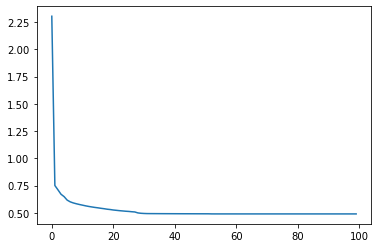

In [72]:
# ce qeu j'ai affiché c'est sans backtracking -> plt.plot(losses_without_backtrack)
# faites-le avec backtracking
def steepest_descent_with_backtracking(X, y, n_class, lam=1, alpha=0.5, beta=0.8, max_iter=100):
    d = X.shape[1]
    W = np.zeros((d, n_class))  # Initialisation des poids
    losses_with_backtrack = []  # Pour enregistrer les valeurs de la fonction de coût
    for i in range(max_iter):
        loss, grad = get_loss_grad(W, X, y, lam, n_class)
        losses_with_backtrack.append(loss)  # Enregistrement de la valeur de la fonction de coût
        step_size = 1
        # Backtracking line search
        while True:
            W_new = W - step_size * grad
            loss_new, _ = get_loss_grad(W_new, X, y, lam, n_class)
            if loss_new < loss - alpha * step_size * np.linalg.norm(grad)**2:
                break
            step_size *= beta
        W = W_new
        if np.linalg.norm(grad) < 1e-6:
            break
    return W, losses_with_backtrack
W, losses_with_backtrack = steepest_descent_with_backtracking(X, y, n_class, lam=1, alpha=0.5, beta=0.8, max_iter=100)
plt.plot(losses_with_backtrack)

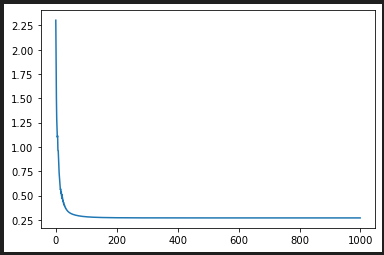